In [2]:
import sys
import cv2
import matplotlib.pyplot as plt
from testSilhouettes import *
import numpy as np
%matplotlib inline

In [120]:
image = cv2.imread("/Users/yingyu/INF574/sketchs/barn/train/888.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

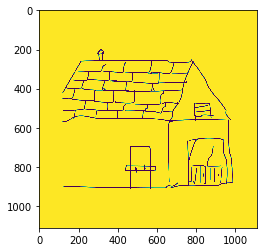

In [132]:
plt.imshow(image)
plt.show()
image = cv2.resize(image, (600, 600), interpolation=cv2.INTER_CUBIC)

In [39]:
 edges = cv2.Canny(image,199,199)

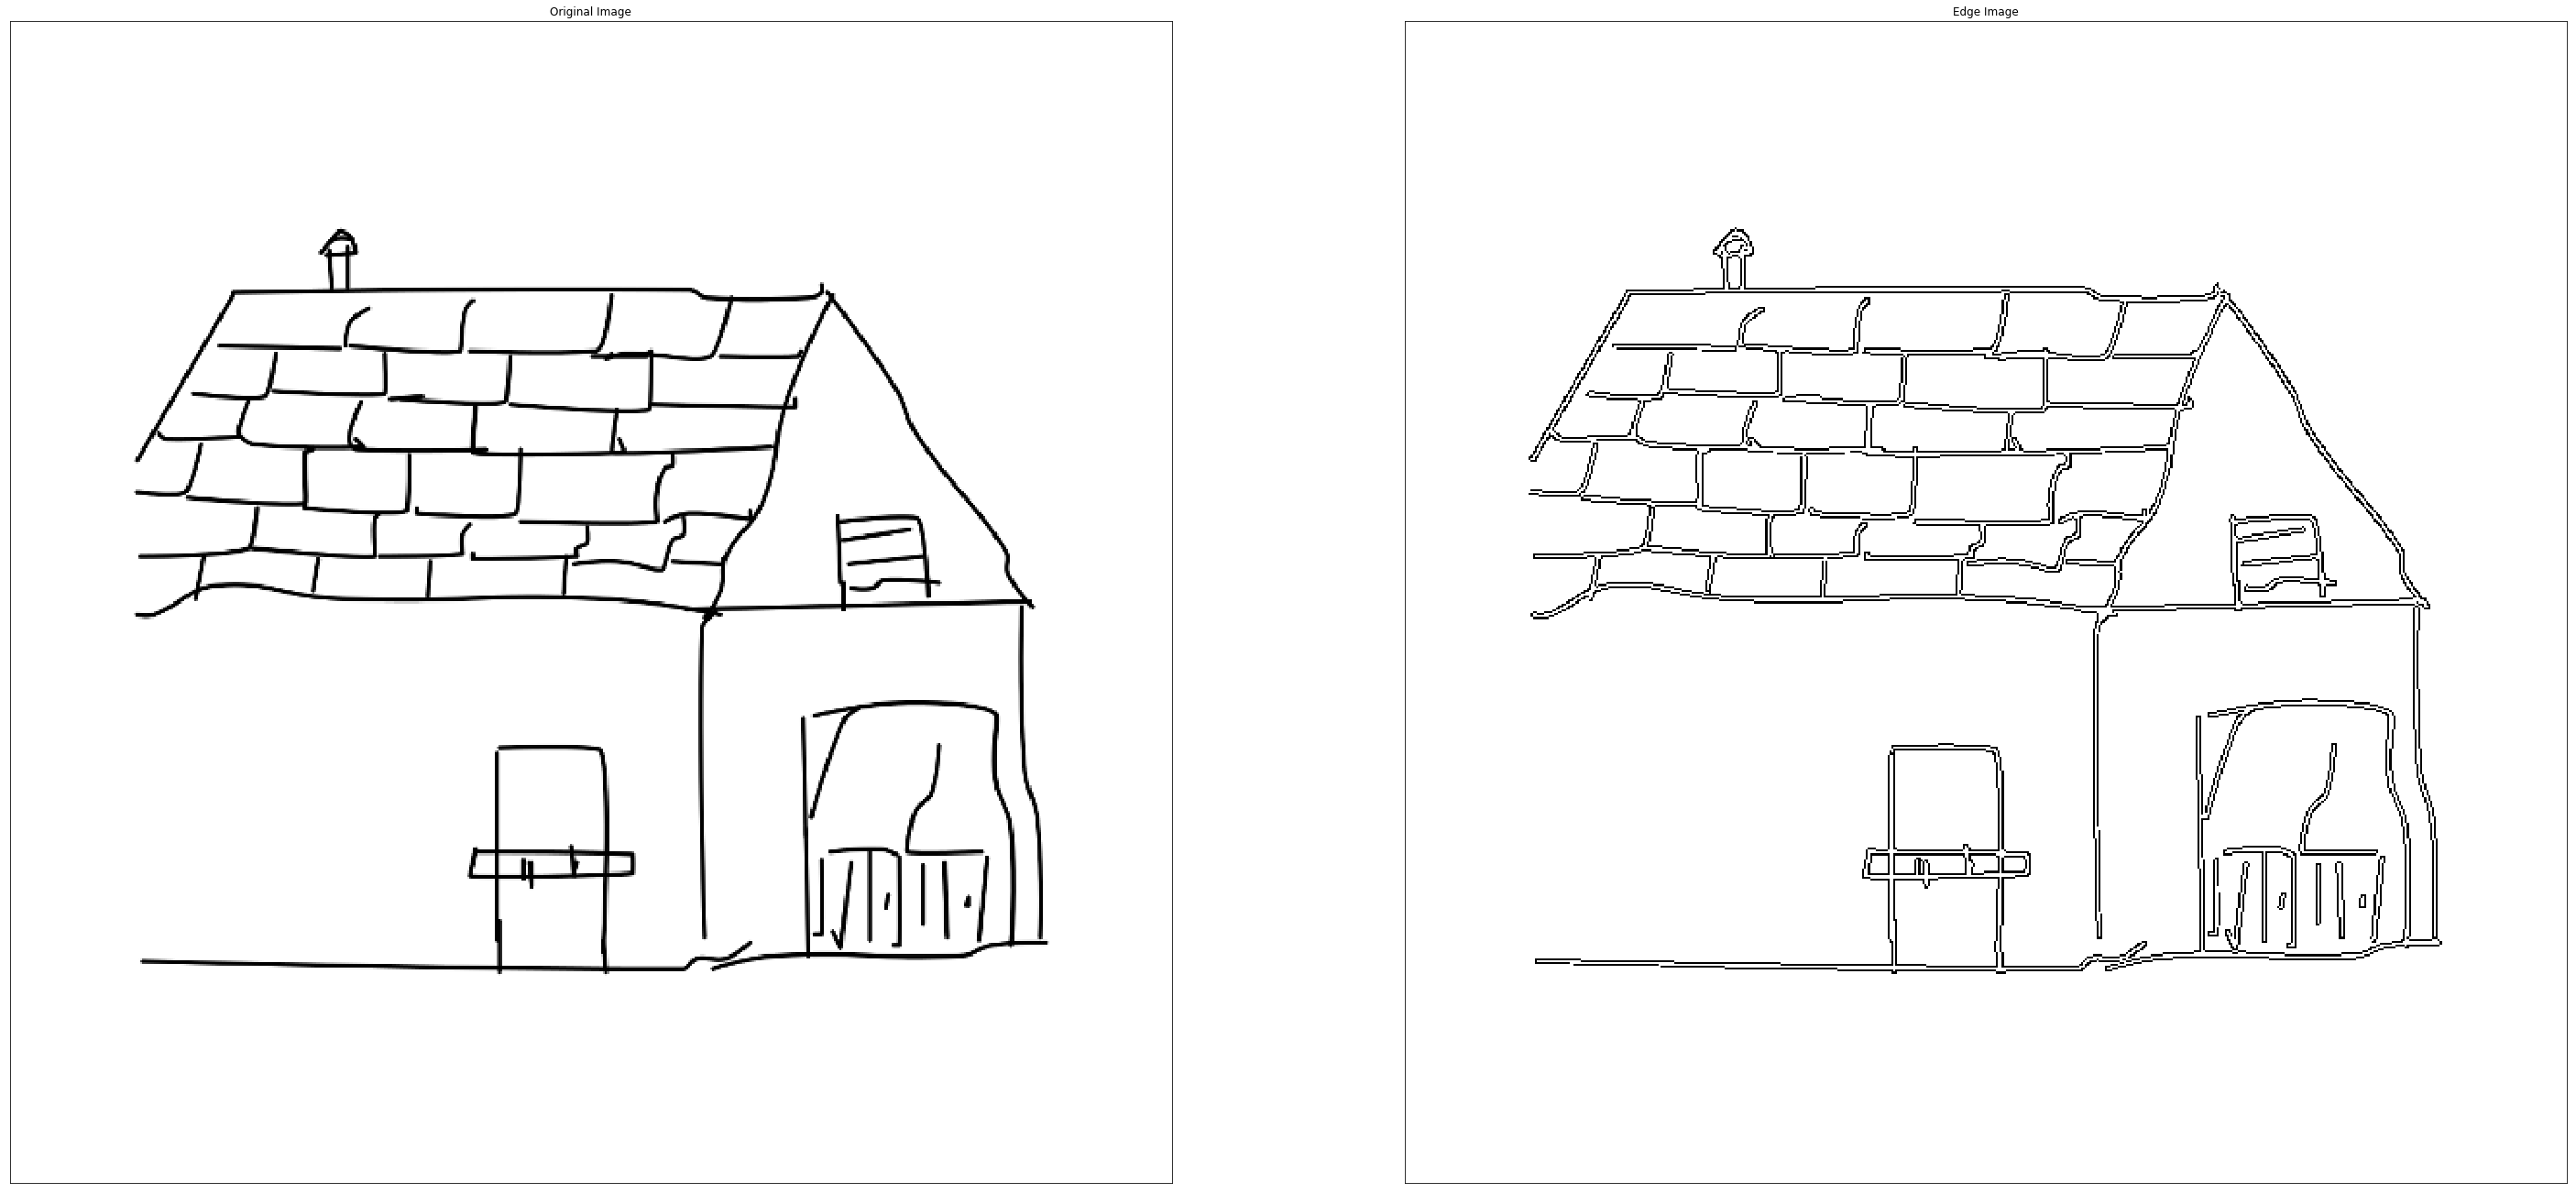

In [40]:
plt.figure(figsize=(50,50))
plt.subplot(121),plt.imshow(image,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(255-edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

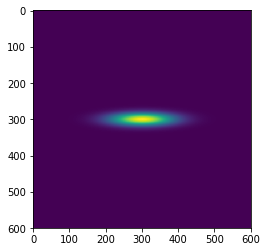

[[6.44948999e-19 2.12199632e-18 1.64248593e-18 ... 4.87563243e-19
  5.90116073e-19 2.61507001e-18]
 [6.26304426e-19 2.12960783e-18 1.62179042e-18 ... 4.74099974e-19
  5.74734249e-19 2.62556003e-18]
 [5.71202685e-19 2.15273541e-18 1.56069220e-18 ... 4.34969882e-19
  5.30126887e-19 2.65689690e-18]
 ...
 [4.82138939e-19 2.19214800e-18 1.46211249e-18 ... 3.73949809e-19
  4.60948130e-19 2.70846422e-18]
 [5.71202727e-19 2.15273552e-18 1.56069227e-18 ... 4.34969942e-19
  5.30126868e-19 2.65689689e-18]
 [6.26304372e-19 2.12960787e-18 1.62179042e-18 ... 4.74100045e-19
  5.74734168e-19 2.62556000e-18]]


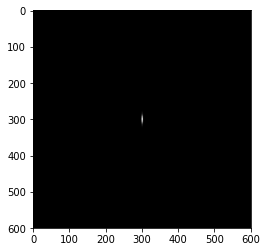

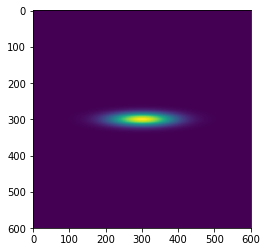

In [73]:
# gabor filter 
def get_gabor_value(u, v, sigma_x, sigma_y, w0, theta):
    x = u* math.cos(theta)-v*math.sin(theta)
    y = u* math.sin(theta)+v*math.cos(theta)    
    res = math.exp(-2*(math.pi**2)*(((x-w0)**2)*sigma_x**2 + (y**2)*sigma_y**2))
    return res 

def get_gabor_filter(theta, side_length = 600, line_width = 0.02, lamb = 0.2, w = 0.13):
    sigma_x = line_width * w
    sigma_y = sigma_x / lamb 
    u = np.arange(-side_length/2, side_length/2)
    v = np.arange(-side_length/2, side_length/2)
    g = np.zeros([side_length,side_length])
    for i in range (side_length):
        for j in range (side_length):
            x = u[j]
            y = v[i]
            g[i][j] = get_gabor_value(x,y,sigma_x,sigma_y,w,theta)
    return g
    
def get_gabor_bank(imgpath, k = 8):
    thetas = np.linspace(0,math.pi, k+1)[:-1]
    index = 0
    for theta in thetas:
        g = get_gabor_filter(theta)
        index = index + 1 
        plt.savefig("%stheta=%02d.png" % (imgpath, index))


g = get_gabor_filter(0) 
plt.imshow(g, interpolation="nearest")
plt.show()
ifft = np.fft.ifftshift(np.fft.ifft2(g))
ma = np.amax(np.abs(ifft))
mi = np.amin(np.abs(ifft))
ifft = np.abs(ifft)
ifft = (ifft-mi)/ma
print(ifft)
plt.imshow(ifft,cmap='gray',clim=(0,1),interpolation="nearest")
plt.show()

plt.imshow(np.abs(np.fft.fftshift(np.fft.fft2(ifft))))  

In [74]:
# gabor response 
def get_gabor_response(theta, img):
    img_fft = np.fft.fftshift(np.fft.fft2(img))
    g = get_gabor_filter(theta)
    response_fft = np.multiply(img_fft,g)
    response = np.fft.ifft2(np.fft.ifftshift(response_fft))
    return np.abs(response)
    

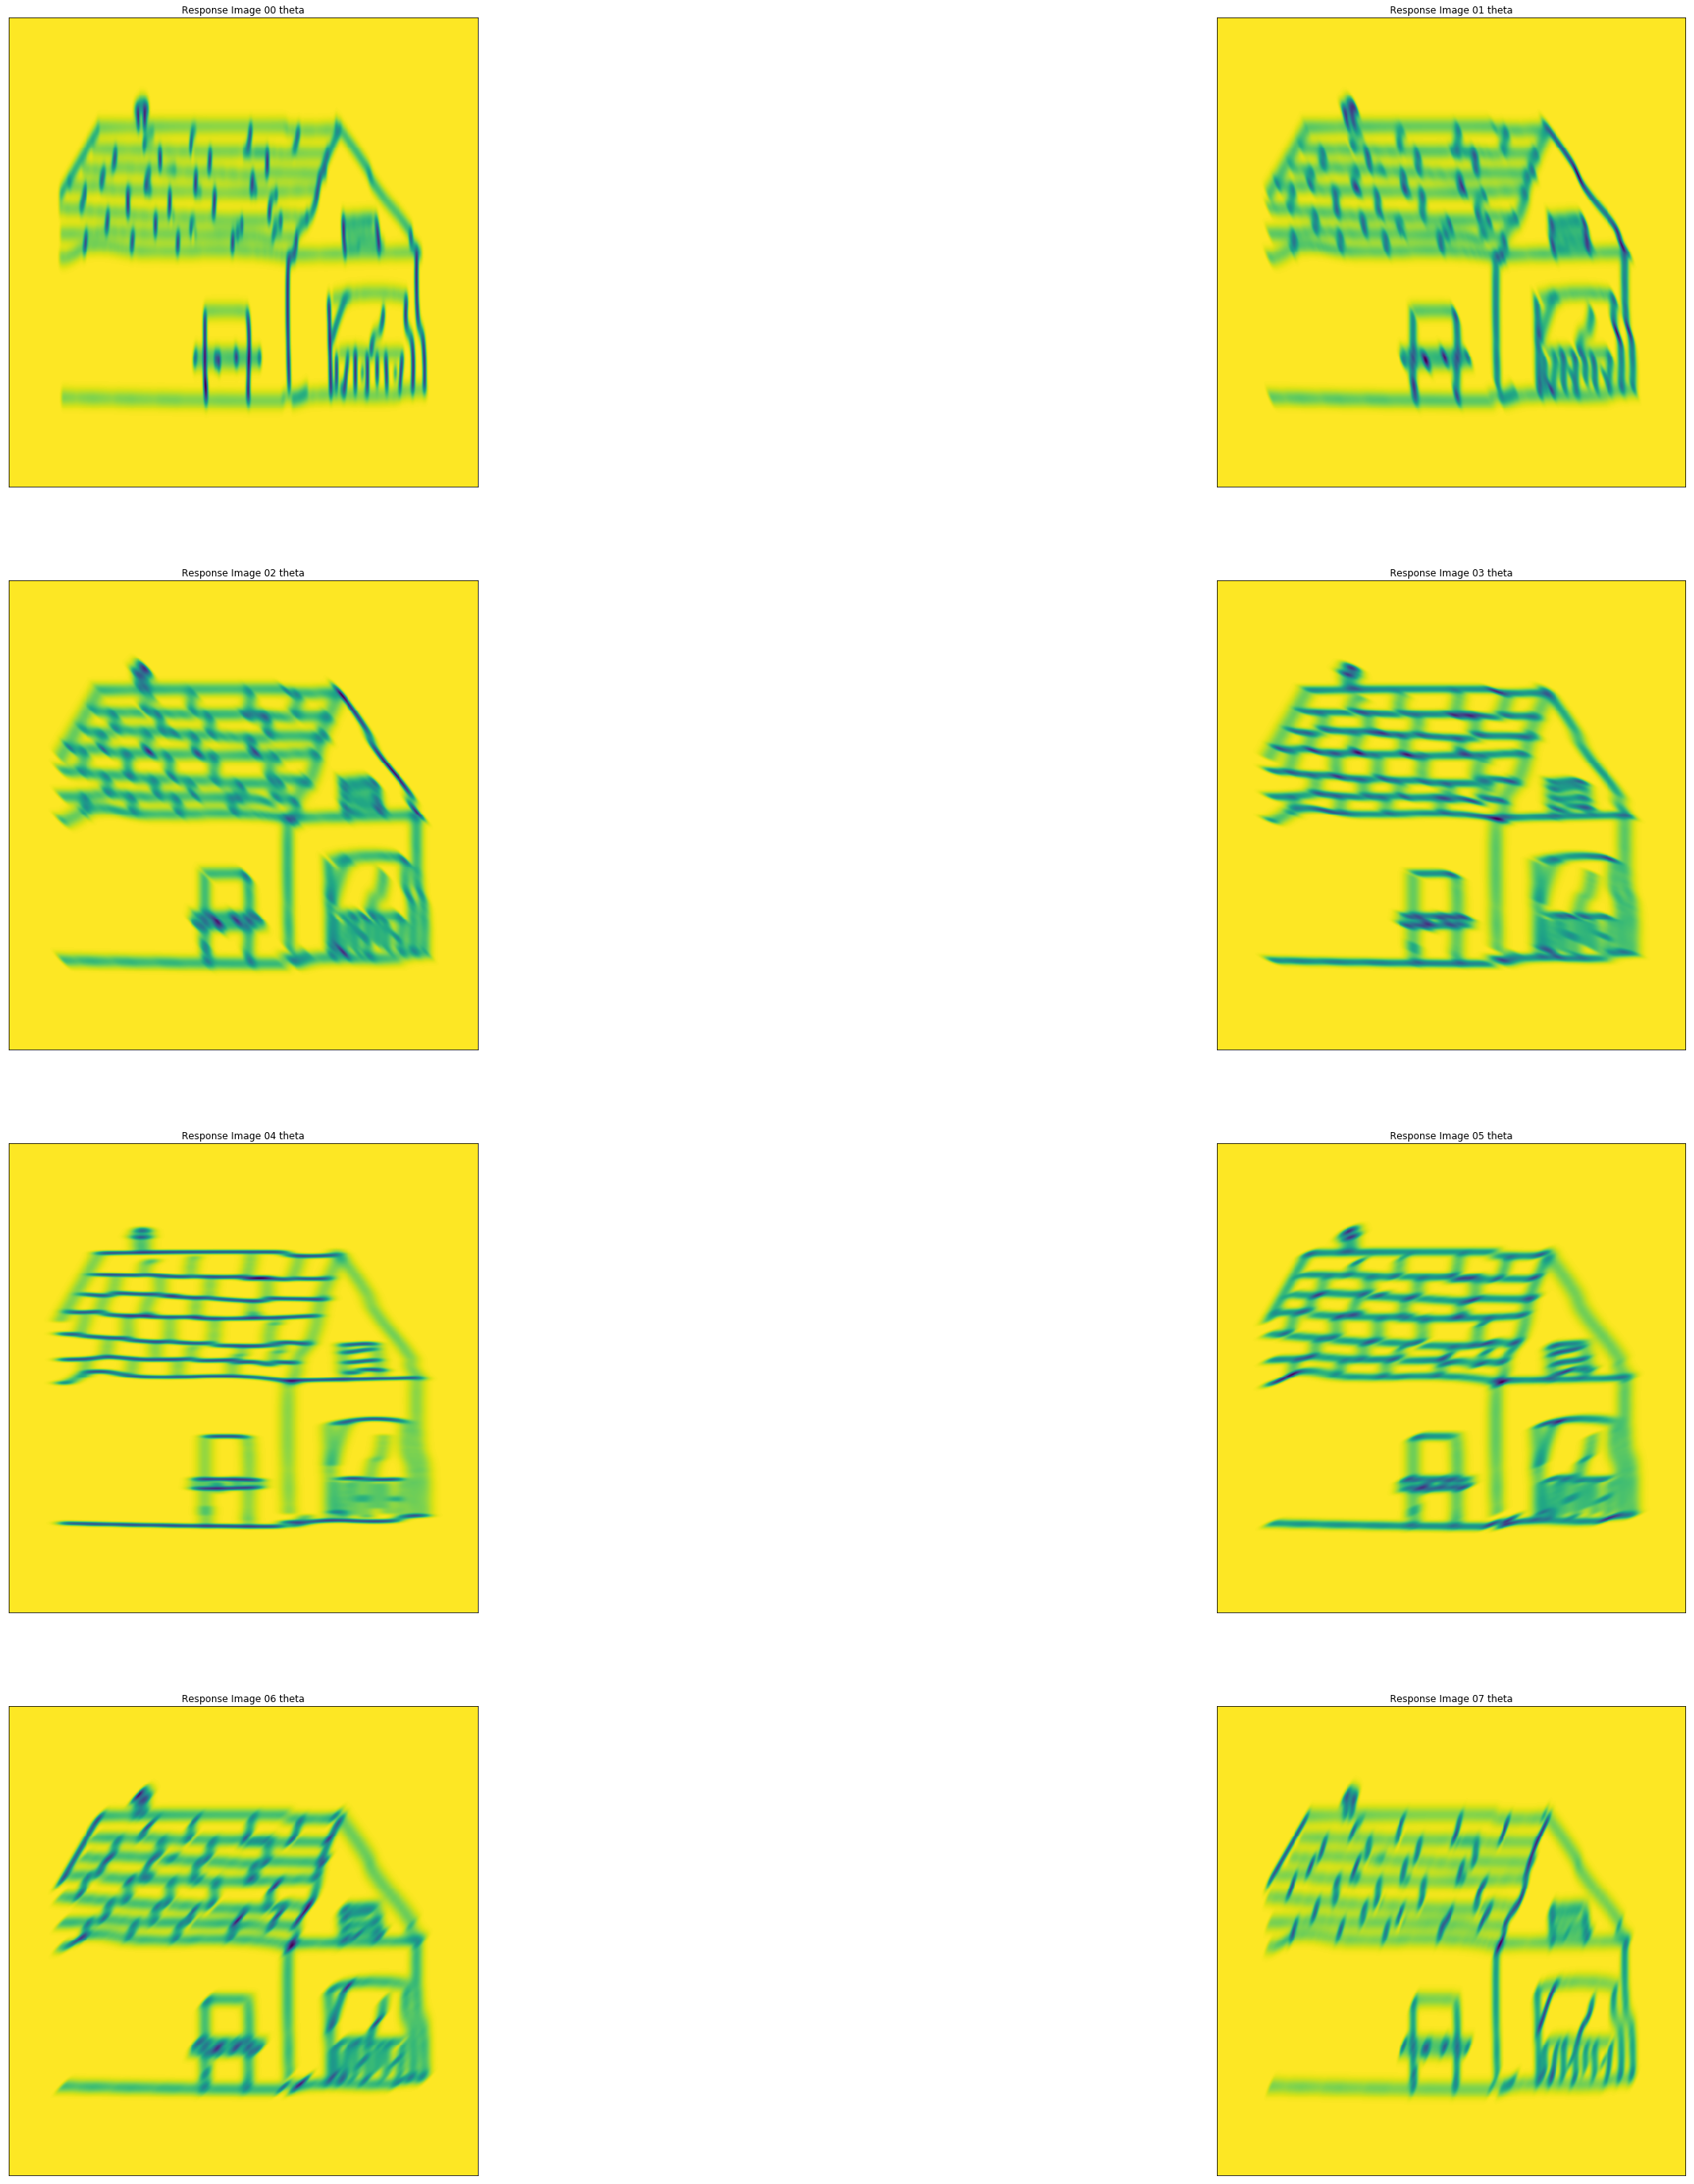

In [75]:
# gabor bank response test 
#image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
thetas = np.linspace(0,math.pi,9)[:-1]
plt.figure(figsize=(50,50))
for i in range (8):
    theta = thetas[i]
    response = get_gabor_response(theta,image)
    plt.subplot(4,2,i+1), plt.imshow(response)
    plt.title('Response Image %02d theta' % i), plt.xticks([]), plt.yticks([])
plt.show()
    


0.2
0.1
[[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.]
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.]
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.]
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.]
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.]
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.]
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.]
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.]
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.]
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.]]
[[-5. -5. -5. -5. -5. -5. -5. -5. -5. -5.]
 [-4. -4. -4. -4. -4. -4. -4. -4. -4. -4.]
 [-3. -3. -3. -3. -3. -3. -3. -3. -3. -3.]
 [-2. -2. -2. -2. -2. -2. -2. -2. -2. -2.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
 [ 3.  3.  3.  3.  3.  3.  3.  3.  3.  3.]
 [ 4.  4.  4.  4.  4.  4.  4.  4.  4.  4.]]


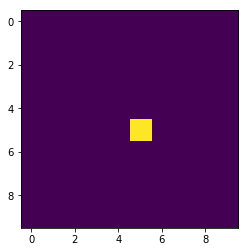

0.19098593171027442
0.09549296585513721


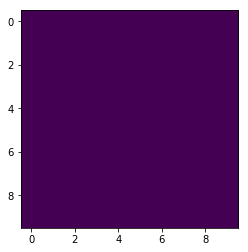

In [83]:
theta = 0
w = 0.13
linewidth = 0.02
width = 512
lamb = 0.3
sigma_x = linewidth * width
sigma_y = sigma_x/ lamb
print(1./sigma_x)
print(1./sigma_y)
l = np.ceil(max(np.abs(sigma_x*math.cos(theta)+sigma_y*math.sin(theta)), np.abs(sigma_x*math.sin(theta)+sigma_y*math.cos(theta))))
x = np.arange(-l/2,l/2)
y = np.arange(-l/2,l/2)
u, v = np.meshgrid(x,y)
U_theta = u*math.cos(theta) + v* math.sin(theta)
V_theta = -u*math.sin(theta) + v* math.cos(theta)
print(U_theta)
print(V_theta)

g = np.exp(-2*(math.pi**2)*(U_theta**2*(sigma_x**2) + (V_theta**2)*(sigma_y**2)))
plt.imshow(g, interpolation="nearest")
plt.show()
print(3./(math.pi*sigma_x))
print(3./(math.pi*sigma_y))

plt.imshow(np.abs(np.fft.ifftshift(np.fft.ifft2(g))))
plt.show()

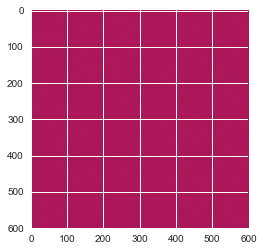

In [209]:
edge_fft = np.fft.fft2(edges)
real = np.real(edge_fft)
plt.imshow(real)
plt.show()

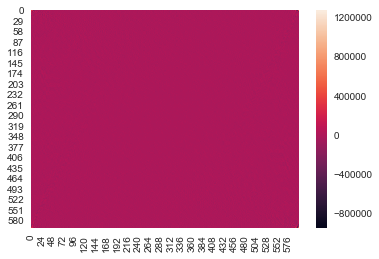

In [32]:
import seaborn as sns
sns.set()
sns.heatmap(real)

In [28]:
np.amin(real)

-942764.2996876077

In [29]:
np.amax(real)

1272705.0

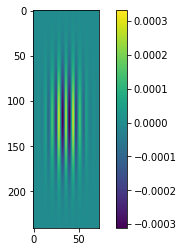

(241, 73)


In [143]:
from skimage.filters import gabor_kernel
kernel = gabor_kernel(0.13,6*math.pi/6,sigma_x = 12, sigma_y = 40)
plt.imshow(np.real(kernel), interpolation='nearest')
plt.colorbar()
plt.show()
print(kernel.shape)

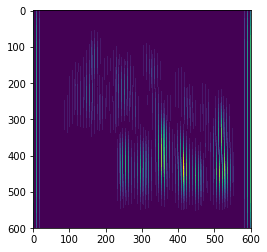

[[2 5 5 ... 5 5 2]
 [2 5 5 ... 5 5 2]
 [2 5 5 ... 5 5 2]
 ...
 [2 5 5 ... 5 5 2]
 [2 5 5 ... 5 5 2]
 [2 5 5 ... 5 5 2]]


In [144]:
new_img = cv2.filter2D(image,-1,np.real(kernel),borderType= cv2.BORDER_CONSTANT)
plt.imshow(new_img)
plt.show()
print(new_img)

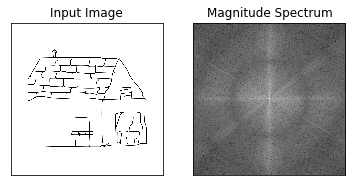

In [130]:
dft = cv2.dft(np.float32(image),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
plt.subplot(121),plt.imshow(image, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()


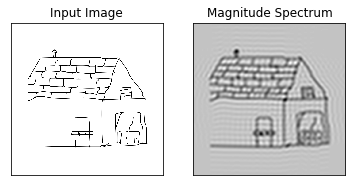

In [131]:
rows, cols = image.shape[0], image.shape[1]
crow, ccol = int(rows/2) , int(cols/2)
# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols,2),np.uint8)
mask[(crow-30):(crow+30),(ccol-30):(ccol+30)] = 1
# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
plt.subplot(121),plt.imshow(image, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

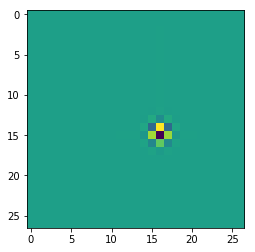

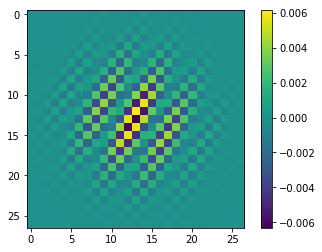

In [117]:
inv_kernel = np.fft.fftshift(np.fft.fft2(kernel))
plt.imshow(np.real(inv_kernel),interpolation='nearest')
plt.show()
plt.imshow(np.real(np.fft.ifft2(inv_kernel)),interpolation='nearest')
plt.colorbar()
plt.show()

In [203]:
def getGabor_value(u, v, sigma_x, sigma_y, w0, theta = 0):
    x = u* math.cos(theta)-v*math.sin(theta)
    y = u* math.sin(theta)+v*math.cos(theta)    
    res = math.exp(-2*(math.pi**2)*(((x-w0)**2)*sigma_x**2 + (y**2)*sigma_y**2))
    return res

# get the gabor filter in frequency domain
def getGabor_filter(theta, w0 = 0.13, n_stds = 3, img_size = 600,sigma_xy = 0.02, linewidth = 0.3):
    sigma_x = linewidth * w0
    sigma_y = sigma_x/sigma_xy
    x0 = np.ceil(max(np.abs(n_stds * sigma_x * np.cos(theta)),1))
    #y0 = np.ceil(max(np.abs(n_stds * sigma_y * np.cos(theta)),
                     #np.abs(n_stds * sigma_x * np.sin(theta)), 1))
    #y, x = np.mgrid[-y0:y0 + 1, -x0:x0 + 1]
    g = np.zeros([int(2*x0+1),int(2*x0+1)])
    w00 = 2.*w0*np.cos(theta)/(2.*x0+1)
    y = np.arange(-x0,x0+1)*w00
    x = np.arange(-x0,x0+1)*w00
    print(y)
    print(x)
    for i in range(0,len(y)):
        for j in range(0,len(x)):
            u = x[j]
            v = y[i]
            g[i][j] = getGabor_value(u,v,sigma_x,sigma_y,w0,theta)
    return g


[-0.08666667  0.          0.08666667]
[-0.08666667  0.          0.08666667]


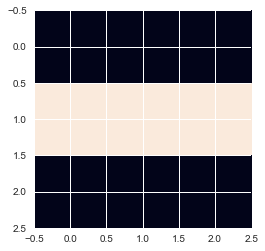

In [204]:
gabor_filter = getGabor_filter(0,0.13)
plt.imshow(gabor_filter)
plt.show()

In [189]:
def getGabor(u, v, w0 = 0.13, theta = 0, sigma_x = 5, sigma_y = 10):
    sigma_y = sigma_x/0.3
    theta = 0.*math.pi/4
    x = u* math.cos(theta)-v*math.sin(theta)
    y = u* math.sin(theta)+v*math.cos(theta)    
    res = math.exp(-2*(math.pi**2)*(((x-w0)**2)*sigma_x**2 + (y**2)*sigma_y**2))
    return res

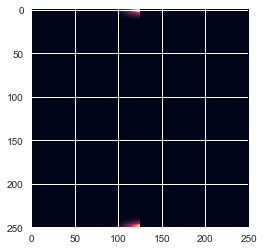

In [192]:
im = np.zeros(edges.shape)
h = im.shape[0]
w = im.shape[1]

im = np.zeros([250,250])
for i in range(-125,125):
    u = float(i*0.001)
    for j in range(-125,125):
        v = float(j*0.001)
        im[j][i] = getGabor(u,v, w0=0.13, sigma_x= 0.02*w)
plt.imshow(im)
plt.show()
#print(im[0])

In [167]:
def getGabor(u, v, w0 = 0.1, sigma_x = 0.5, sigma_y = 10):
    sigma_y = sigma_x/0.3
    theta = 0
    x = u* math.cos(theta)-v*math.sin(theta)
    y = u* math.sin(theta)+v*math.cos(theta)    
    res = math.exp(-2*(math.pi**2)*(((x-w0)**2)*sigma_x**2 + ((y)**2)*sigma_y**2))
    return res

In [14]:
im = np.zeros(edges.shape)
w = len(im)
for i in range(len(im)):
    u = 2*math.pi*i/len(im)
    #print(u)
    for j in range(len(im[0])):
        
        v = 2*math.pi*j/len(im)
        im[i][j] = getGabor(u, v, w0=0.13, sigma_x= 0.02*w)

In [15]:
np.sum(np.multiply(im, im))

4.125895574663202e-39

/Users/yingyu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


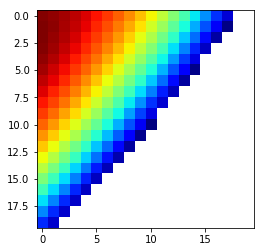

In [20]:
plt.imshow(np.log(im)[0:20,0:20], cmap='jet')
plt.show()

In [17]:
changed = np.abs(np.fft.ifft(np.multiply(np.fft.fft(edges), im)))

TypeError: Image data cannot be converted to float

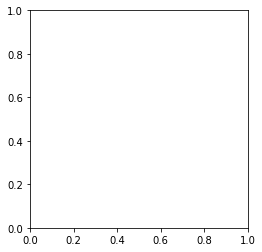

In [22]:
plt.imshow(10**47*changed)
plt.show()

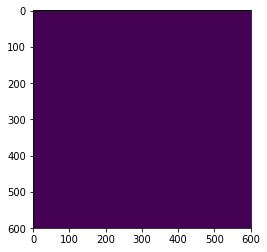

In [507]:
plt.imshow(np.abs(np.fft.ifft( im)))
plt.show()

In [508]:
f = np.fft.fft2(np.abs(image))